In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import iqr
import statsmodels.api as sm

# Soal 1
Load dataset all_cars.csv yang telah Anda buat, simpan dalam variabel bernama ‘df_car’.
• Jika ada kolom bernama 'Unnamed: 0', ubah nama kolom tersebut menjadi 'id'!
• Jika tidak ada, lakukan reset index. Kemudian kolom paling kiri bernama 'index' ubah menjadi 'id'!

In [46]:
df_car = pd.read_csv('all_cars.csv')
df_car

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,Audi,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,Audi,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,Audi,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,Audi,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...,...
22261,Toyota,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
22262,Toyota,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
22263,Toyota,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
22264,Toyota,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


In [47]:
df_car.reset_index(inplace=True)
df_car.rename(columns={'index':'id'},inplace=True)
df_car

,id,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,Audi,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,1,Audi,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,2,Audi,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,3,Audi,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,4,Audi,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...,...,...
22261,22261,Toyota,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
22262,22262,Toyota,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
22263,22263,Toyota,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
22264,22264,Toyota,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


# Soal 2
Tampilkan deskripsi statistik dari dataset df_car.

In [48]:
df_car.describe(include='all')

,id,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
count,22266.000000,22266,22266,22266.000000,22266.000000,22266,22266.000000,22266,22266.000000,22266.000000,22266.000000
unique,NaN,3,60,NaN,NaN,4,NaN,4,NaN,NaN,NaN
top,NaN,Audi,Yaris,NaN,NaN,Manual,NaN,Petrol,NaN,NaN,NaN
freq,NaN,10668,2122,NaN,NaN,11806,NaN,12052,NaN,NaN,NaN
mean,11132.500000,NaN,NaN,2016.995509,17542.591575,NaN,23501.863604,NaN,115.473592,55.151181,1.688489
std,6427.784883,NaN,NaN,2.133576,10589.835312,NaN,21111.157417,NaN,68.835239,14.834181,0.566379
min,0.000000,NaN,NaN,1997.000000,850.000000,NaN,1.000000,NaN,0.000000,1.100000,0.000000
25%,5566.250000,NaN,NaN,2016.000000,9999.000000,NaN,7200.000000,NaN,30.000000,44.800000,1.400000
50%,11132.500000,NaN,NaN,2017.000000,14999.000000,NaN,18354.000000,NaN,145.000000,55.400000,1.600000
75%,16698.750000,NaN,NaN,2019.000000,21991.000000,NaN,33100.750000,NaN,145.000000,62.800000,2.000000


# Soal 3
Kita mengenal bahwa Variabel dibagi menjadi 2, yaitu variabel Kualitatif dan Kuantitatif.
- Var. Kualitatif dibagi menjadi 2, yaitu: Nominal dan Ordinal
- Var. Kuantitatif dibagi menjadi 2, yaitu: Continue dan Discrete
- Kolom mana saja yang menurut Anda merupakan var. kualitatif? Mana yang Nominal dan Ordinal?
- Kolom mana saja yang menurut Anda merupakan var. kuantitatif? Mana yang Continue dan Discrete?

In [49]:
#   Kualitatif:
#       - Nominal   : [id,brand,model,transmision,fuelType]
#       - Ordinal   : []
#   Kuantitatif:
#       - Continue  : [price, mileage,tax,mpg,engineSize]
#       - Discrete  : [year]

# Soal 4
Apa yg dimaksud dengan Measure of Central Tendency? Tampilkan Measure of Central Tendency dari kolom 'model' dan 'price'! Central Tendency apa yang cocok untuk kolom 'model' dan 'price'?

In [50]:
# Measure of central tendency adalah pengukuran titik pusat data.
df_car['model'].mode()

0    Yaris
Name: model, dtype: object

In [51]:
df_car['price'].skew()

2.307305520099183

In [52]:
df_car['price'].median()

14999.0

# Soal 5
Apa yang dimaksud dengan Measure of Spread? Tampilkan Measure of Spread dari kolom 'price'!

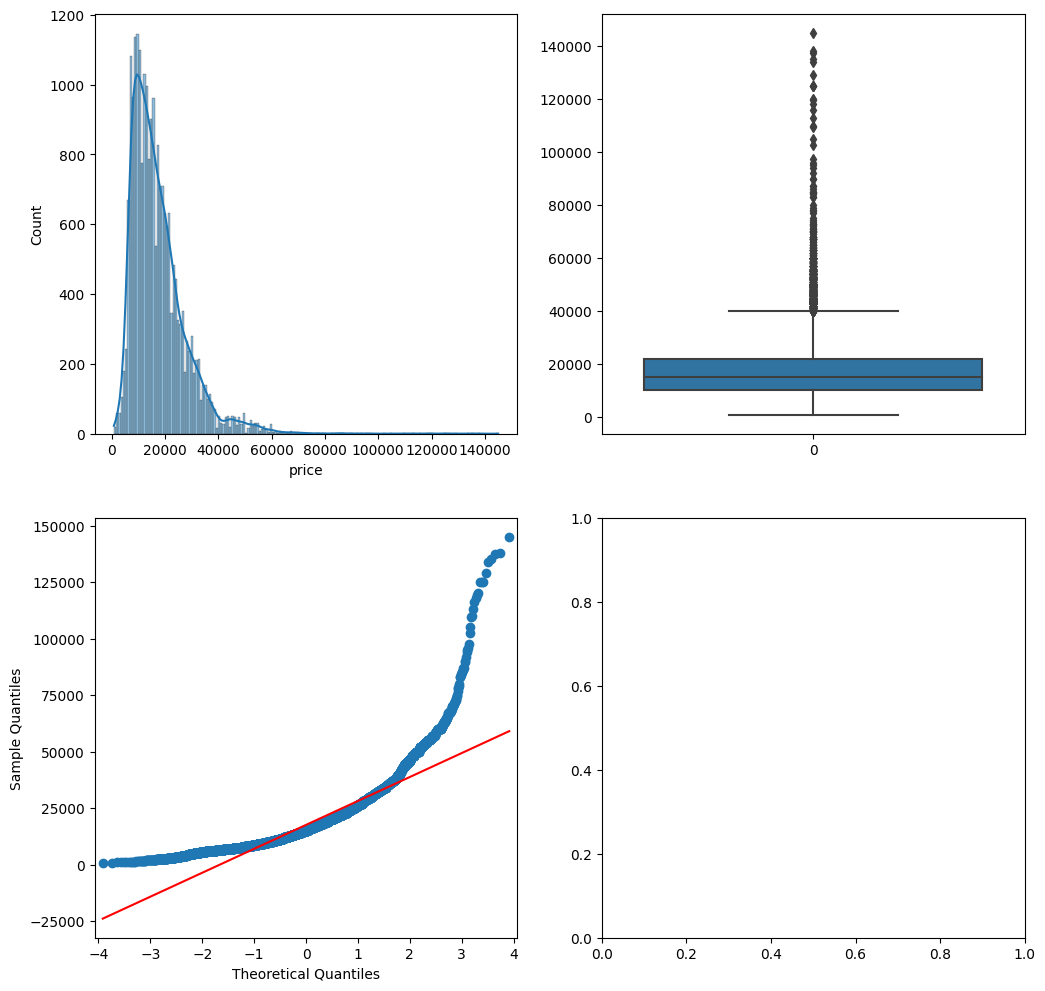

In [53]:
# Measure of spread adalah pengukuran persebaran data. [Range, Std, IQR]
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
sns.histplot(data = df_car['price'], kde=True, ax=axs[0,0])
sns.boxplot(data = df_car['price'], ax=axs[0,1])
sm.qqplot(data = df_car['price'], line='s', ax=axs[1,0]);

# Soal 6

Apakah ada Outlier pada kolom 'price'? Kalau ada, berapa banyak data yang merupakan outliers?

In [54]:
# Ada
len(df_car[
(df_car['price']>df_car['price'].describe()['75%']+1.5*iqr(df_car['price'])) | 
(df_car['price']<df_car['price'].describe()['25%']-1.5*iqr(df_car['price']))])

808

# Soal 7
Variabel/kolom apa saja yang memiliki distribusi skewed ke kanan?

In [55]:
print(f'{"Variable":^15}{"Skew":^15}')
for i in ['year','price','mileage','tax','mpg','engineSize']:
        sk=round(df_car[i].skew(),2)
        if sk>1:
                print(f'{i:^15}{sk:>6}{" (Right Skewed)":<6}')
        elif sk<1:
                print(f'{i:^15}{sk:>6}{" (Left Skewed)":<6}')
        else:
                print(f'{i:^15}{sk:>6}{" (Normal Distribution)":<6}')


   Variable         Skew      
     year       -1.75 (Left Skewed)
     price       2.31 (Right Skewed)
    mileage       1.7 (Right Skewed)
      tax        0.15 (Left Skewed)
      mpg        2.44 (Right Skewed)
  engineSize     1.18 (Right Skewed)


# Soal 8
Grafik apa yang cocok untuk menampilkan visualisasi:
- brand vs price
- price vs mileage
- frequency distribution of mileage

<Axes: xlabel='mileage', ylabel='Count'>

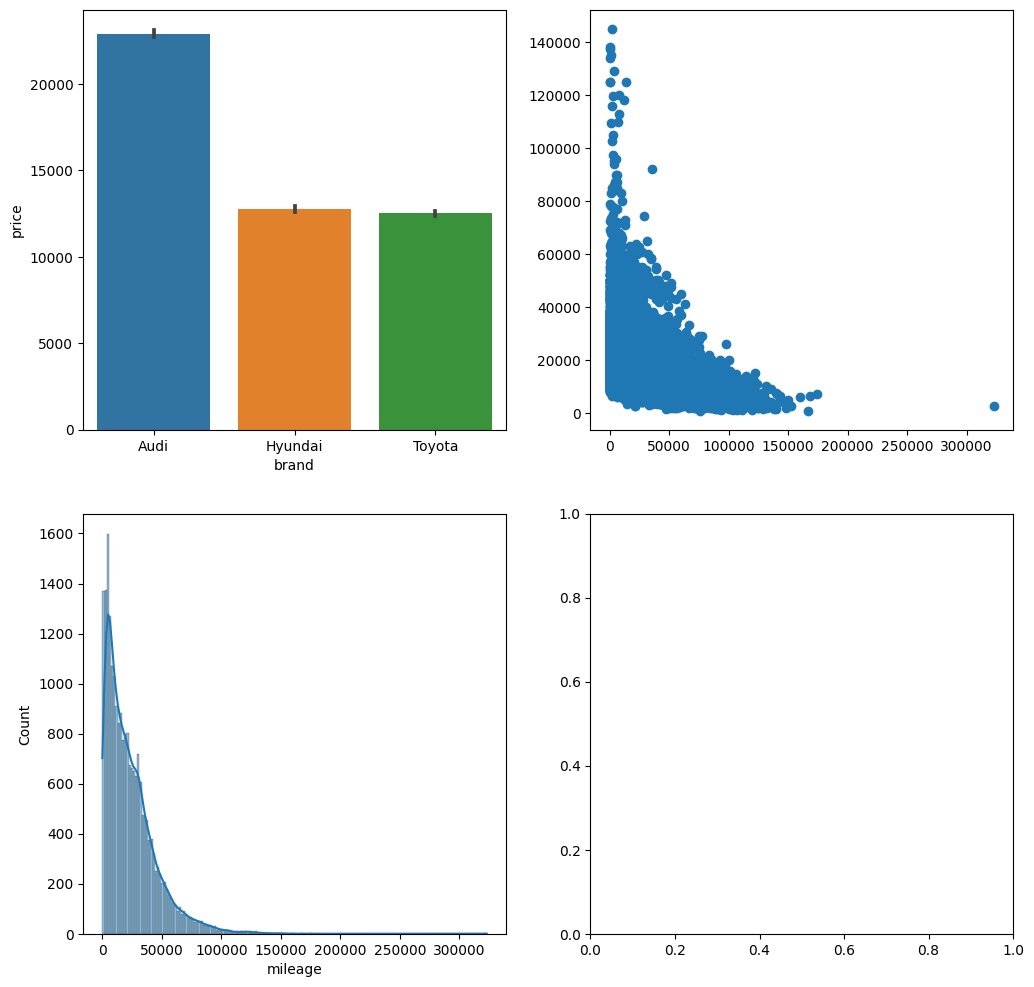

In [56]:
# - brand vs price                      ----> Categorical vs Numeric    ---> Barchart
# - price vs mileage                    ----> Numeric vs Nummeric       --->  Scaterplot
# - frequency distribution of mileage   ----> Numeric(Frequency)        --->  Histogram

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
sns.barplot(data=df_car,x='brand',y='price',ax=axs[0,0])
axs[0,1].scatter(df_car['mileage'],df_car['price'])
sns.histplot(data=df_car['mileage'], kde=True, ax=axs[1,0])

<Axes: >

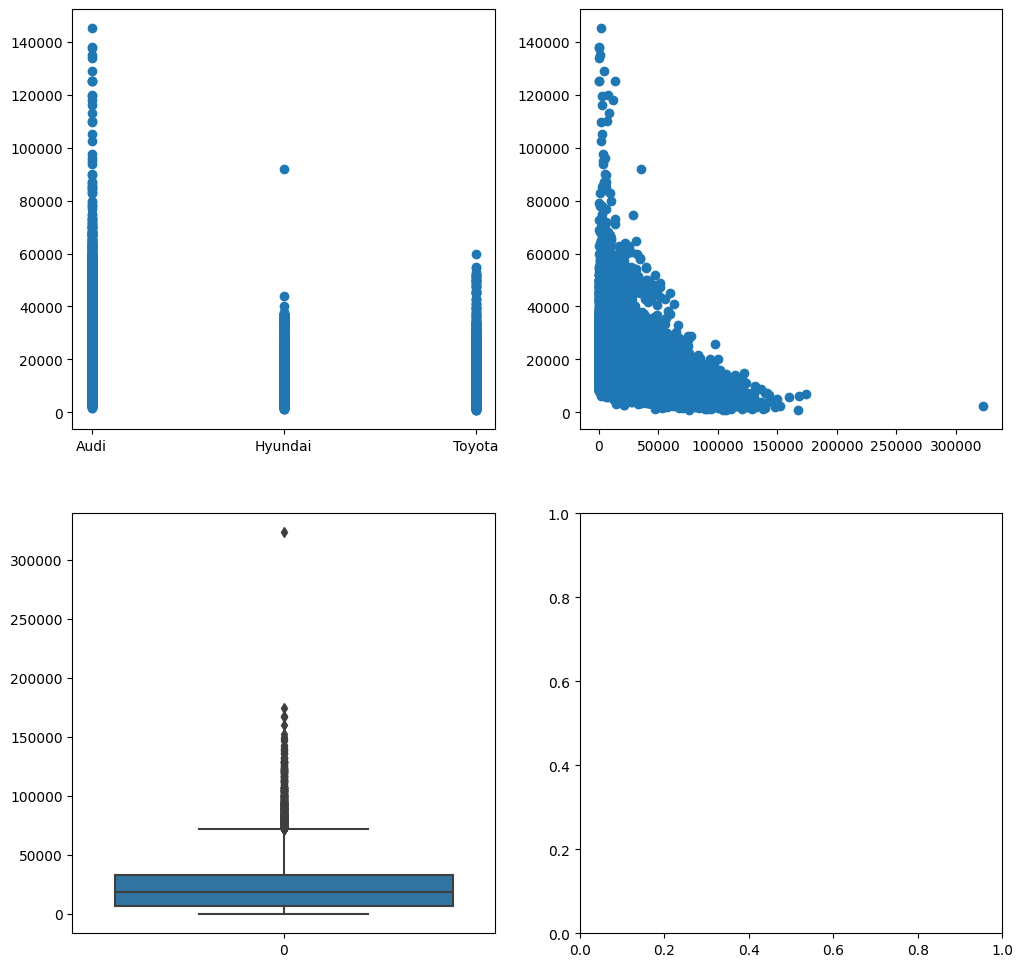

In [57]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs[0,0].scatter(df_car['brand'],df_car['price'])
axs[0,1].scatter(df_car['mileage'],df_car['price'])
sns.boxplot(data = df_car['mileage'], ax=axs[1,0])

# Soal 9
![Screenshot 2023-07-28 135144.png](<attachment:Screenshot 2023-07-28 135144.png>)
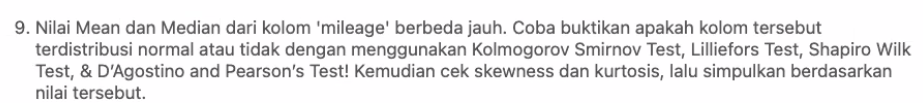

In [58]:
from scipy.stats import kstest
ks = kstest(df_car['mileage'],'norm')
if ks[1]>0.05:
    print(f'P Value= {ks[1]}, Normal Distribution')
else:
    print(f'P Value= {ks[1]}, Not Normal Distribution')

P Value= 0.0, Not Normal Distribution


In [59]:
from statsmodels.stats.diagnostic import lilliefors
ll = lilliefors(df_car['mileage'])
ll
if ll[1]>0.05:
    print(f'P Value= {ll[1]}, Normal Distribution')
else:
    print(f'P Value= {ll[1]}, Not Normal Distribution')

P Value= 0.0009999999999998899, Not Normal Distribution


In [60]:
from scipy.stats import shapiro
sh = shapiro(df_car['mileage'])
sh
if sh[1]>0.05:
    print(f'P Value= {sh[1]}, Normal Distribution')
else:
    print(f'P Value= {sh[1]}, Not Normal Distribution')

P Value= 0.0, Not Normal Distribution


c:\Users\Vincent\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [61]:
from scipy.stats import normaltest
nt = normaltest(df_car['mileage'])
nt
if nt[1]>0.05:
    print(f'P Value= {nt[1]}, Normal Distribution')
else:
    print(f'P Value= {nt[1]}, Not Normal Distribution')

P Value= 0.0, Not Normal Distribution


In [62]:
skew9 = df_car['mileage'].skew()
if skew9<-0.5:
    print(f'Skew= {skew9}, Left Skew/Negative Distribution')
elif skew9>0.5:
    print(f'Skew= {skew9}, Right Skew/Positive Distribution')
else:
    print(f'Skew= {skew9}, Normal Distribution')

Skew= 1.7043504776960094, Right Skew/Positive Distribution


In [63]:
kur9 = df_car['mileage'].kurtosis()
if kur9<3:
    print(f'Kurtosis= {kur9}, Platykurtic')
elif kur9>3:
    print(f'Kurtosis= {kur9}, Leptokurtic')
else:
    print(f'Kurtosis= {kur9}, Mesokurtic')
# 3 masih termasuk distribusi normal mesokurtic
# >3 ---> Menjulang leptokurtic
# <3 ---> Landai platykurtic

Kurtosis= 5.2952853473383055, Leptokurtic
